In [4]:
from skimage.io import imread
from skimage.transform import resize
import matplotlib.pyplot as plt
import os
import random
import pandas as pd
import numpy as np
import h5py


import sys
sys.path.insert(0, '../lib/')
from image_processing import *

# IDRiD Localization

In [2]:
img_size = (480,480)
# Localization Test Data
img_dir = "/home/ec2-user/data/IDRiD/Localization/Original_Images/Testing_Set/"
loc_test_imgs = imgs_to_array(img_dir, img_size)

loc_test_center_path = "/home/ec2-user/data/IDRaiD/Localization/Groundtruths/OpticDiscCenterLocation/IDRiD_OD_Center_Testing Set_Markups.csv"
loc_test_center = center_to_array(loc_test_center_path, img_size)

# Localization Training Data
img_dir = "/home/ec2-user/data/IDRiD/Localization/Original_Images/Training_Set/"
loc_train_imgs = imgs_to_array(img_dir, img_size)

loc_train_center_path = "/home/ec2-user/data/IDRiD/Localization/Groundtruths/OpticDiscCenterLocation/IDRiD_OD_Center_Training Set_Markups.csv"
loc_train_center = center_to_array(loc_train_center_path, img_size)

images loaded: 0


/home/ec2-user/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


images loaded: 100
images loaded: 0


/home/ec2-user/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


images loaded: 100
images loaded: 200
images loaded: 300
images loaded: 400


# IDRiD Segmentation

In [2]:
img_size = (360,540)
img_dir = "/home/ec2-user/data/IDRiD/Segmentation/Original_Images/Training_Set/"
seg_train_imgs = imgs_to_array(img_dir, img_size, resize_method="REFUGEE")

# mask
img_dir = "/home/ec2-user/data/IDRiD/Segmentation/All_Segmentation_Groundtruths/TrainingSet/OpticDisc/"
seg_train_masks = imgs_to_array(img_dir, img_size, resize_method="REFUGEE")

images loaded: 0


/home/ec2-user/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


images loaded: 0


TypeError: 'NoneType' object is not subscriptable

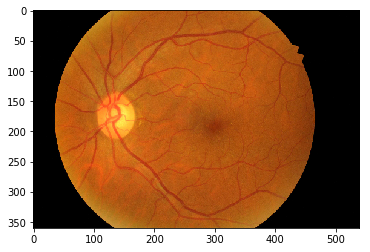

In [5]:
i = random.randint(0,40)
show_img(seg_train_imgs[i])


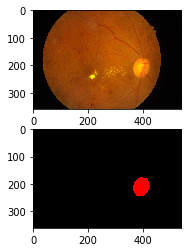

In [22]:
i = random.randint(0,40)

img = seg_train_imgs[i]
mask = seg_train_masks[i]

def show_img_mask(img, mask):
    fig = plt.figure()
    ax1 = fig.add_subplot(2,1,1)
    ax1 = ax1.imshow(img)

    ax2 = fig.add_subplot(2,1,2)
    ax2 = ax2.imshow(mask)

    return ax1, ax2
ax1 , ax2 = show_img_mask(img,mask)

In [23]:
img_size = (480,480)
# Localization Test Data
img_dir = "/home/ec2-user/data/IDRiD/Localization/Original_Images/Testing_Set/"
loc_test_imgs = imgs_to_array(img_dir, img_size)

images loaded: 0


/home/ec2-user/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


images loaded: 100


# Refugee

In [2]:
img_dir = "/home/ec2-user/data/REFUGEE/Training400/Glaucoma/"
imgs = imgs_to_array(img_dir, img_size=(480,480), resize_method= 'REFUGEE')

images loaded: 0


/home/ec2-user/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


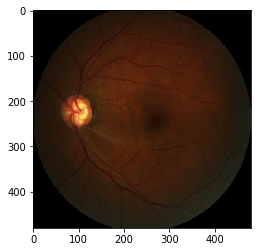

In [3]:
i = random.randint(0,40)
show_img(imgs[i])

# Save it to hdf5 file

In [24]:
data_path = "/home/ec2-user/data/IDRiD/hdf5/"
if not os.path.exists(data_path):
    os.mkdir(data_path)

write_hdf5(loc_train_imgs, data_path + "loc_train_imgs")
write_hdf5(loc_test_imgs, data_path + "loc_test_imgs")
write_hdf5(loc_train_center, data_path + "loc_train_center")
write_hdf5(loc_test_center, data_path + "loc_test_center")

NameError: name 'loc_train_imgs' is not defined